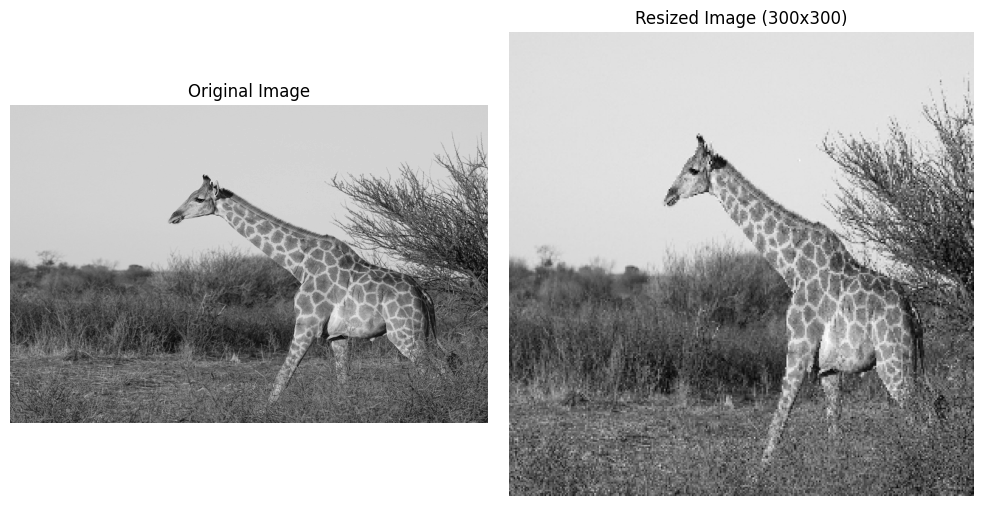

Resized image saved as resized_image.jpg


In [1]:
# linear_interpolation.py

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def linear_interpolation(input_path, output_path, new_width, new_height):
    # Open the image and convert it to grayscale
    img = Image.open(input_path).convert("L")
    img_array = np.array(img)

    # Get the original image dimensions
    original_height, original_width = img_array.shape

    # Create an empty array for the resized image
    resized_array = np.zeros((new_height, new_width), dtype=np.uint8)

    # Compute scale factors
    x_scale = original_width / new_width
    y_scale = original_height / new_height

    # Perform linear interpolation
    for i in range(new_height):
        for j in range(new_width):
            # Find corresponding coordinates in the original image
            orig_x = int(j * x_scale)
            orig_y = int(i * y_scale)
            
            # Linear interpolation for x-direction (horizontal)
            if orig_x + 1 < original_width:
                weight_x = (j * x_scale) - orig_x
                pixel_value_x = (1 - weight_x) * img_array[orig_y, orig_x] + weight_x * img_array[orig_y, orig_x + 1]
            else:
                pixel_value_x = img_array[orig_y, orig_x]
                
            # Linear interpolation for y-direction (vertical)
            if orig_y + 1 < original_height:
                weight_y = (i * y_scale) - orig_y
                pixel_value_y = (1 - weight_y) * pixel_value_x + weight_y * img_array[orig_y + 1, orig_x]
            else:
                pixel_value_y = pixel_value_x

            # Assign the interpolated pixel value to the resized image
            resized_array[i, j] = pixel_value_y

    # Convert the resized array back to an image
    resized_img = Image.fromarray(resized_array)

    # Save the resized image
    resized_img.save(output_path)
    
    # Display the original and resized images
    plt.figure(figsize=(10, 5))
    
    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")
    
    # Display resized image
    plt.subplot(1, 2, 2)
    plt.imshow(resized_img, cmap="gray")
    plt.title(f"Resized Image ({new_width}x{new_height})")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    input_path = "input.jpg"          # Replace with the path to your input image
    output_path = "resized_image.jpg"  # Desired output image path
    new_width = 300                    # New width for the resized image
    new_height = 300                   # New height for the resized image
    linear_interpolation(input_path, output_path, new_width, new_height)
    print(f"Resized image saved as {output_path}")
